In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('data/student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
df.shape

(395, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
#Checking for null values
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [7]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.iloc[:,0]=le.fit_transform(df.iloc[:,0])
df.iloc[:,1]=le.fit_transform(df.iloc[:,1])
df.iloc[:,3]=le.fit_transform(df.iloc[:,3])
df.iloc[:,4]=le.fit_transform(df.iloc[:,4])
df.iloc[:,5]=le.fit_transform(df.iloc[:,5])
df.iloc[:,8]=le.fit_transform(df.iloc[:,8])
df.iloc[:,9]=le.fit_transform(df.iloc[:,9])
df.iloc[:,10]=le.fit_transform(df.iloc[:,10])
df.iloc[:,11]=le.fit_transform(df.iloc[:,11])
df.iloc[:,15]=le.fit_transform(df.iloc[:,15])
df.iloc[:,16]=le.fit_transform(df.iloc[:,16])
df.iloc[:,17]=le.fit_transform(df.iloc[:,17])
df.iloc[:,18]=le.fit_transform(df.iloc[:,18])
df.iloc[:,19]=le.fit_transform(df.iloc[:,19])
df.iloc[:,20]=le.fit_transform(df.iloc[:,20])
df.iloc[:,21]=le.fit_transform(df.iloc[:,21])
df.iloc[:,22]=le.fit_transform(df.iloc[:,22])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [8]:
#Adding up similar columns
df['Pedu']=df['Medu']+df['Fedu']
df['nstudytime']=df['traveltime']+df['freetime']+df['goout']
df['alc']=df['Dalc']+df['Walc']
df_1=df.drop(['Medu','Fedu','traveltime','freetime','goout','Dalc','Walc'], axis='columns')
df_1

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,...,romantic,famrel,health,absences,G1,G2,G3,Pedu,nstudytime,alc
0,0,0,18,1,0,0,0,4,0,1,...,0,4,3,6,5,6,6,8,9,2
1,0,0,17,1,0,1,0,2,0,0,...,0,5,3,4,5,5,6,2,7,2
2,0,0,15,1,1,1,0,2,2,1,...,0,4,3,10,7,8,10,2,6,5
3,0,0,15,1,0,1,1,3,1,1,...,1,3,5,2,15,14,15,6,5,2
4,0,0,16,1,0,1,2,2,1,0,...,0,4,5,4,6,10,10,6,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,3,3,0,2,...,0,5,4,11,9,9,9,4,10,9
391,1,1,17,1,1,1,3,3,0,1,...,0,2,2,3,14,16,16,4,11,7
392,1,1,21,0,0,1,2,2,0,2,...,0,5,3,3,10,8,7,2,9,6
393,1,1,18,0,1,1,3,2,0,1,...,0,4,5,0,11,12,10,5,8,7


In [9]:
#EDA
#Finding the correlation of all features to the target feature G3
m_corr=df_1.corr()['G3'].abs().sort_values(ascending=False)
m_corr

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Pedu          0.205224
higher        0.182465
age           0.161579
romantic      0.129970
reason        0.121994
nstudytime    0.118744
address       0.105756
sex           0.103456
Mjob          0.102082
paid          0.101996
internet      0.098483
studytime     0.097820
schoolsup     0.082788
famsize       0.081407
guardian      0.070109
health        0.061335
alc           0.058245
Pstatus       0.058009
nursery       0.051568
famrel        0.051363
school        0.045017
Fjob          0.042286
famsup        0.039157
absences      0.034247
activities    0.016100
Name: G3, dtype: float64

In [10]:
#select top 10 highly correlated features to target G3
m_corr=m_corr[0:10].sort_values(ascending=False)
m_corr

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Pedu          0.205224
higher        0.182465
age           0.161579
romantic      0.129970
reason        0.121994
nstudytime    0.118744
Name: G3, dtype: float64

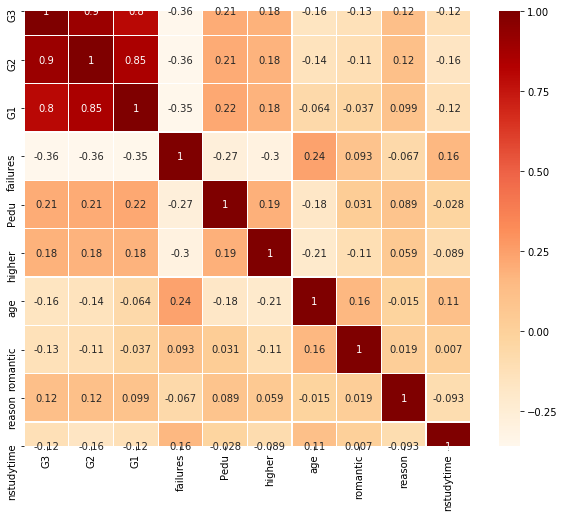

In [11]:
#Plotting heatmap of highly correlated featrues to G3
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_1[m_corr.index].corr(), linewidths=0.2, annot=True, cmap="OrRd");

In [12]:
df_2= df_1.loc[:, m_corr.index]

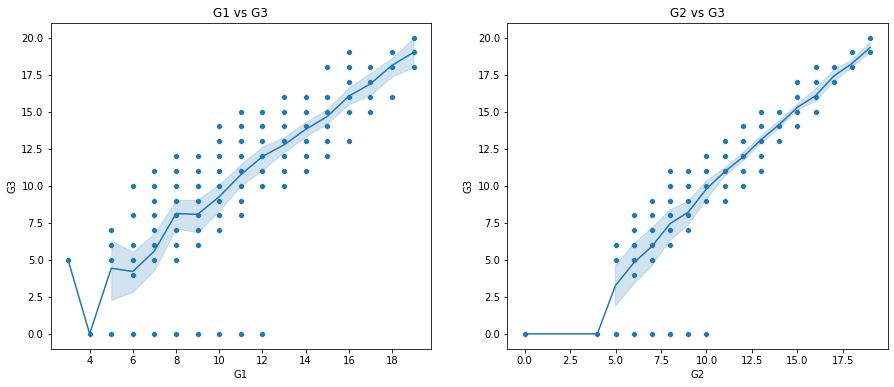

In [13]:
#G2 vs G3
plt.figure(figsize=(15,6))
ax =  plt.subplot(1, 2, 1)
plt.title('G1 vs G3')
sns.scatterplot(x='G1', y='G3', data=df_2)
sns.lineplot(x='G1', y='G3', data=df_2)
ax = plt.subplot(1, 2, 2)
plt.title('G2 vs G3')
sns.scatterplot(x='G2', y='G3', data=df_2)
sns.lineplot(x='G2', y='G3', data=df_2)

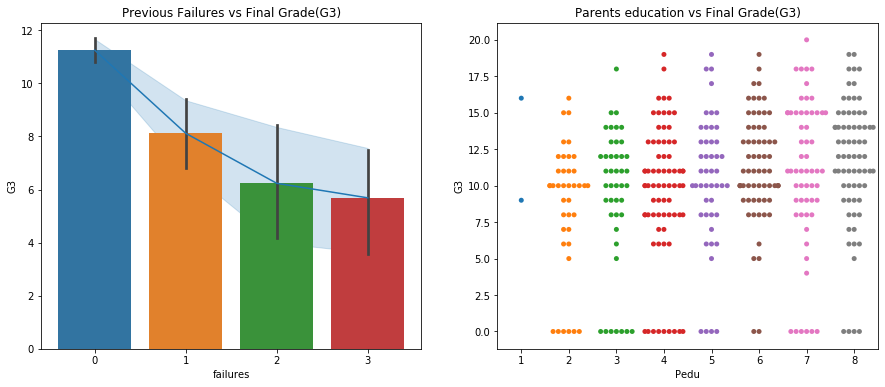

In [14]:
#failures vs G3 and Parents education vs G3
plt.figure(figsize=(15,6))
ax =  plt.subplot(1, 2, 1)
plt.title('Previous Failures vs Final Grade(G3)')
sns.barplot(x=df_2['failures'],y=df_2['G3'])
sns.lineplot(x=df_2['failures'],y=df_2['G3'])
ax = plt.subplot(1, 2, 2)
plt.title('Parents education vs Final Grade(G3)')
sns.swarmplot(x='Pedu', y='G3', data=df_2)

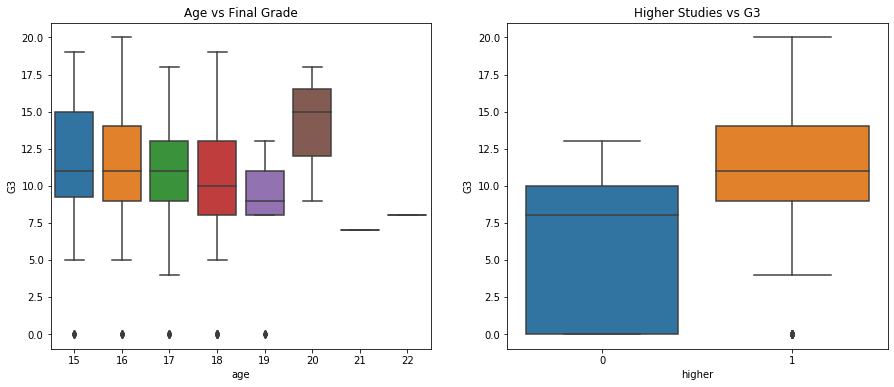

In [15]:
#Age vs G3 and higher studies vs G3
plt.figure(figsize=(15,6))
ax =  plt.subplot(1, 2, 1)
plt.title('Age vs Final Grade')
sns.boxplot(x='age', y='G3',data=df_2)
ax = plt.subplot(1, 2, 2)
plt.title('Higher Studies vs G3')
sns.boxplot(x='higher', y='G3', data=df_2)

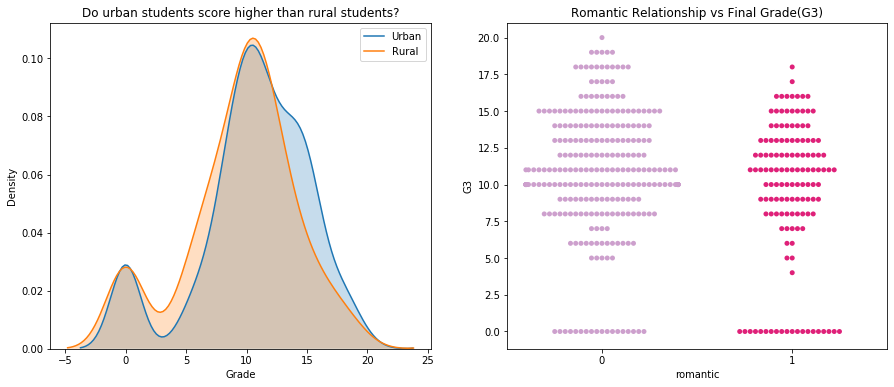

In [16]:
# Grade distribution by address and romantic vs G3
plt.figure(figsize=(15,6))
ax =  plt.subplot(1, 2, 1)
sns.kdeplot(df_1.loc[df_1["address"] == 1, 'G3'], label='Urban', shade = True)
sns.kdeplot(df_1.loc[df_1["address"] == 0, 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?')
plt.xlabel('Grade');
plt.ylabel('Density')
ax = plt.subplot(1, 2, 2)
plt.title('Romantic Relationship vs Final Grade(G3)')
sns.swarmplot(x=df_2['romantic'],y=df_2['G3'],palette='PuRd')

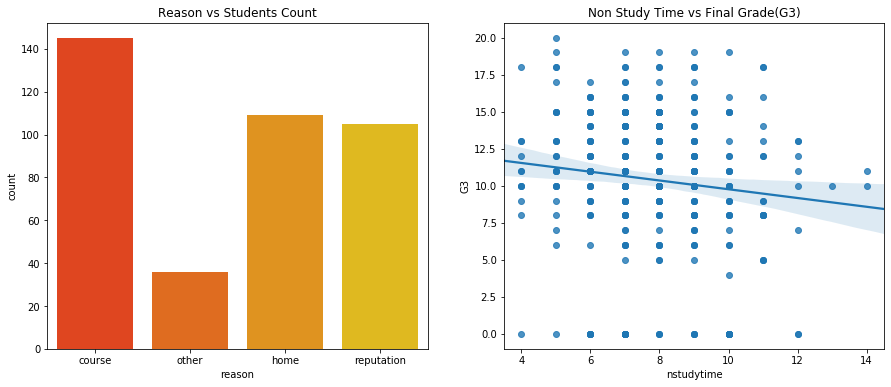

In [17]:
temp = pd.read_csv('data/student-mat.csv')
#Reason to choose school vs G3 and Non Study Time vs G3
plt.figure(figsize=(15,6))
ax =  plt.subplot(1, 2, 1)
sns.countplot(x='reason',data=temp,palette='autumn') 
plt.title('Reason vs Students Count')
ax = plt.subplot(1, 2, 2)
plt.title('Non Study Time vs Final Grade(G3)')
sns.regplot(x=df_1['nstudytime'], y =df_1['G3'])

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso , Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

In [19]:
df_2

,G3,G2,G1,failures,Pedu,higher,age,romantic,reason,nstudytime
0,6,6,5,0,8,1,18,0,0,9
1,6,5,5,0,2,1,17,0,0,7
2,10,8,7,3,2,1,15,0,2,6
3,15,14,15,0,6,1,15,1,1,5
4,10,10,6,0,6,1,16,0,1,6
...,...,...,...,...,...,...,...,...,...,...
390,9,9,9,2,4,1,20,0,0,10
391,16,16,14,0,4,1,17,0,0,11
392,7,8,10,3,2,1,21,0,0,9
393,10,12,11,0,5,1,18,0,0,8


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_2.drop('G3',axis=1), df_2['G3'], test_size = 0.25, random_state=42)

In [21]:
linear = LinearRegression()
lasso_reg = make_pipeline(MinMaxScaler(),Lasso(alpha=0.0005, random_state=1))
rf_reg = RandomForestRegressor()
ridge_reg = make_pipeline(MinMaxScaler(),Ridge(alpha=0.0005, random_state=1))
xgb_reg = XGBRegressor()

In [22]:
def evaluate(X_train, X_test, y_train, y_test):
        model_name_list = ['Linear Regression',' Lasso Regression','Random Forest','Ridge Regression','XGBoost regression']
        results = pd.DataFrame(columns=['mae', 'rmse','R Square'], index = model_name_list)
        for i, model in enumerate([linear, lasso_reg, rf_reg,ridge_reg,xgb_reg]):
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
        
            # Metrics
            mae = np.mean(abs(predictions - y_test))
            rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
            r_square=model.score(X_test, y_test)
        
            # Insert results into the dataframe
            model_name = model_name_list[i]
            results.loc[model_name, :] = [mae, rmse,r_square]
   
        return results

In [23]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse,R Square
Linear Regression,1.24568,2.101,0.808394
Lasso Regression,1.24402,2.10006,0.808565
Random Forest,1.35569,2.10037,0.808508
Ridge Regression,1.24569,2.10099,0.808395
XGBoost regression,1.59672,2.65899,0.693104


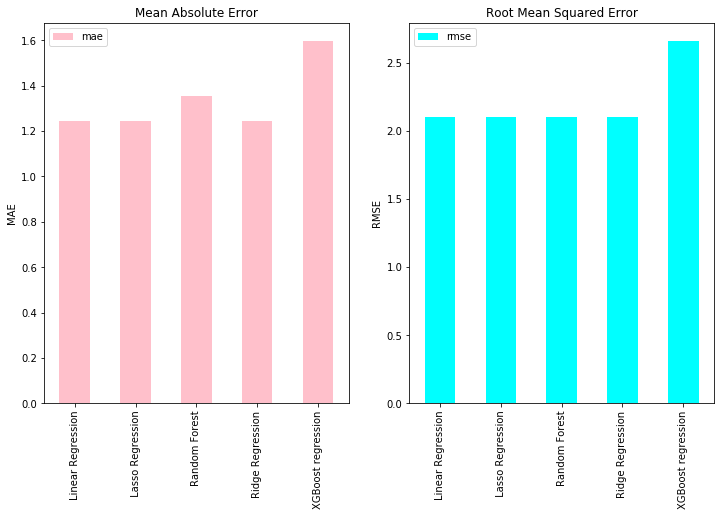

In [25]:
plt.figure(figsize=(12, 7))

# Mean absolute error
ax =  plt.subplot(1, 2, 1)
results.plot.bar(y = 'mae', color = 'pink', ax = ax)
plt.title('Mean Absolute Error') 
plt.ylabel('MAE')

# Root Mean Squared error
ax = plt.subplot(1, 2, 2)
results.plot.bar(y = 'rmse', color = 'aqua', ax = ax)
plt.title('Root Mean Squared Error') 
plt.ylabel('RMSE')

plt.show()